# Pandas em 15 minutos

Esta é uma pequena introdução à biblioteca [`pandas`](https://pandas.pydata.org/) para novas usuárias. 

> **Nota**
> 
> Este tutorial é baseado na documentação oficial (versão 1.2.3, Python 3.7). Para um início um pouco mais aprofundado recomendamos:
> - [Getting started tutorials](https://pandas.pydata.org/pandas-docs/stable/getting_started/intro_tutorials/index.html)
> - [10 minutes to pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html)
> - [Cookbook](https://pandas.pydata.org/pandas-docs/stable/user_guide/cookbook.html)
>
> E para a referência técnica dos métodos e funções apresentadas aqui:
> - [API reference](https://pandas.pydata.org/pandas-docs/stable/reference/index.html)



## O que é pandas?

É uma biblioteca que oferece diversas ferramentas para análise de dados. Um canivete suíço para quem quer começar a deixar as planilhas de lado e começar a analisar dados programaticamente.


## Como eu normalmente trabalho com os dados?



Primeiro, importando a biblioteca :)

In [ ]:
import pandas as pd

O apelido `pd` é uma convenção 😄.

A biblioteca introduz dois tipos principais de estruturas de dados: `DataFrame` e `Series`.



### `DataFrame`

![dataframe](https://pandas.pydata.org/pandas-docs/stable/_images/01_table_dataframe.svg)*Seção "Getting started" (What kind of data does pandas handle?)*

Um `DataFrame` uma espécie de planilha, com linhas, colunas e índices. Pra quem estiver acostumado com planilhas fica fácil de entender.



De toda forma, vamos demonstrar:

In [ ]:
df = pd.DataFrame(
    [
        {"Nome": "Mônica de Sousa", "Idade": 7},
        {"Nome": "Cebolácio Menezes da Silva Júnior", "Idade": 7},
        {"Nome": "Magali Fernandes de Lima", "Idade": 7},
        {"Nome": "Cássio Marques de Araújo", "Idade": 7},
    ]
)
df

,Nome,Idade
0,Mônica de Sousa,7
1,Cebolácio Menezes da Silva Júnior,7
2,Magali Fernandes de Lima,7
3,Cássio Marques de Araújo,7


Através de alguns atributos do `DataFrame`, conseguimos ver que ele possui 4 linhas (com índice numérico de 0 a 3) e 2 colunas (com índice categórico "Nome" e "Idade"):


In [ ]:
df.shape

(4, 2)

In [ ]:
df.index

RangeIndex(start=0, stop=4, step=1)

In [ ]:
df.columns

Index(['Nome', 'Idade'], dtype='object')

Para ver quais tipos de dados estamos lidando, `pandas` oferece um método bem prático:


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Nome    4 non-null      object
 1   Idade   4 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 192.0+ bytes



> **Nota**
> 
> Até agora estamos apenas lidando com dados e índice de tipo "textual" e numérico. Mas `pandas` suporta muitos outros tipos de dados.

Um detalhe: cada coluna desse `DataFrame` é uma `Series`.


### `Series`

Cada coluna pode ser acessada independentemente, preservando o índice das linhas.

![series](https://pandas.pydata.org/pandas-docs/stable/_images/01_table_series.svg) *Seção "Getting started" (What kind of data does pandas handle?)*

Esta estrutura de dados é ideal para lidar com dados de tipo homogêneo (como normalmente teríamos em uma coluna de um `DataFrame`).

In [ ]:
df["Nome"]

0                      Mônica de Sousa
1    Cebolácio Menezes da Silva Júnior
2             Magali Fernandes de Lima
3             Cássio Marques de Araújo
Name: Nome, dtype: object

In [ ]:
type(df["Nome"])

pandas.core.series.Series

Para uma `Series` numérica, um método bastante útil pode ser utilizado para apresentar algumas estatísticas bem comuns:

In [ ]:
df["Idade"].describe()

count    4.0
mean     7.0
std      0.0
min      7.0
25%      7.0
50%      7.0
75%      7.0
max      7.0
Name: Idade, dtype: float64

Não foi muito útil 😝.

Mas, podemos adicionar novas linhas a um `DataFrame` existente e verificar a diferença:

In [ ]:
df2 = pd.DataFrame(
    {
        "Nome": ["Horácio", "Papa-Capim"],
        "Idade": [66000000, 7],
    }
)
df2

,Nome,Idade
0,Horácio,66000000
1,Papa-Capim,7


> **Nota**
>
> `df` e `df2` foram criados usando estruturas diferentes (lista de dicionários e dicionário de listas, respectivamente).
> `pandas` geralmente dá flexibilidade no seu uso para acomodar o seu jeito e seus dados.

In [ ]:
df = pd.concat([df, df2])
df

,Nome,Idade
0,Mônica de Sousa,7
1,Cebolácio Menezes da Silva Júnior,7
2,Magali Fernandes de Lima,7
3,Cássio Marques de Araújo,7
0,Horácio,66000000
1,Papa-Capim,7


> **Nota**
>
> Como pode ser visto, o índice preexistente dos dois `DataFrames` permaneceu inalterado após a concatenação. Há maneiras de corrigir isso, se quiser. Uma delas é usar o argumento `ignore_index=True` no `pd.concat`.

In [ ]:
df["Idade"].describe()

count    6.000000e+00
mean     1.100001e+07
std      2.694438e+07
min      7.000000e+00
25%      7.000000e+00
50%      7.000000e+00
75%      7.000000e+00
max      6.600000e+07
Name: Idade, dtype: float64

Agora sim 😅.

Além de adicionar linhas, também é fácil adicionar colunas:

In [ ]:
import numpy as np

df["Cor da camiseta/vestido"] = [
    "Vermelha",
    "Verde",
    "Amarela",
    "Amarela",
    np.nan,
    np.nan,
]
df

,Nome,Idade,Cor da camiseta/vestido
0,Mônica de Sousa,7,Vermelha
1,Cebolácio Menezes da Silva Júnior,7,Verde
2,Magali Fernandes de Lima,7,Amarela
3,Cássio Marques de Araújo,7,Amarela
0,Horácio,66000000,NaN
1,Papa-Capim,7,NaN


Além da coluna, duas coisas novas apareceram:

1. `numpy`: Biblioteca muito poderosa para lidar com dados numéricos e `pandas` se baseia muito nela tanto por performance quanto por conveniência.

1. `np.nan` (*Not A Number*): Valor normalmente usado em `pandas` quando não se reconhece um valor. Podemos pensar nele como uma espécie de `None`, "N/A", `NULL`, etc.

## Visualizando

Para visualizar com mais facilidade `DataFrames` e `Series` (principalmente quando o conjunto de dados for bem grande).

### Coluna como `list`

In [ ]:
df["Nome"].to_list()

['Mônica de Sousa',
 'Cebolácio Menezes da Silva Júnior',
 'Magali Fernandes de Lima',
 'Cássio Marques de Araújo',
 'Horácio',
 'Papa-Capim']

### Coluna como `np.array`

In [ ]:
df["Idade"].to_numpy()

array([       7,        7,        7,        7, 66000000,        7])

### Valores ordenados

In [ ]:
df["Idade"].sort_values()

0           7
1           7
2           7
3           7
1           7
0    66000000
Name: Idade, dtype: int64

### Gráfico

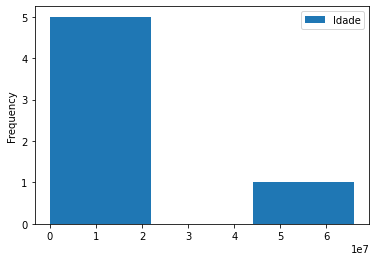

In [ ]:
df.plot.hist(by="Idade", bins=3)

Histograma um pouco bizarro 😆. Mas se deu pra entender, tá ótimo!

`df.plot` possui vários outros tipos de gráficos criados usando a biblioteca `matplotlib` como base.

## Selecionando

Para usar apenas um subconjunto desejado dos dados.

### Primeiras linhas

In [ ]:
df.head(3)

,Nome,Idade,Cor da camiseta/vestido
0,Mônica de Sousa,7,Vermelha
1,Cebolácio Menezes da Silva Júnior,7,Verde
2,Magali Fernandes de Lima,7,Amarela


### Últimas linhas

In [ ]:
df.tail(2)

,Nome,Idade,Cor da camiseta/vestido
0,Horácio,66000000,NaN
1,Papa-Capim,7,NaN


### Exemplos escolhidos aleatoriamente

In [ ]:
df.sample(3)

,Nome,Idade,Cor da camiseta/vestido
1,Papa-Capim,7,NaN
3,Cássio Marques de Araújo,7,Amarela
0,Mônica de Sousa,7,Vermelha


### Fatia

In [ ]:
df[1:3]

,Nome,Idade,Cor da camiseta/vestido
1,Cebolácio Menezes da Silva Júnior,7,Verde
2,Magali Fernandes de Lima,7,Amarela


### Apenas uma coluna

In [ ]:
df["Idade"]

0           7
1           7
2           7
3           7
0    66000000
1           7
Name: Idade, dtype: int64

### Mais de uma coluna

In [ ]:
df[["Nome", "Idade"]]

,Nome,Idade
0,Mônica de Sousa,7
1,Cebolácio Menezes da Silva Júnior,7
2,Magali Fernandes de Lima,7
3,Cássio Marques de Araújo,7
0,Horácio,66000000
1,Papa-Capim,7


### Filtro



In [ ]:
df[df["Idade"] > 7]

,Nome,Idade,Cor da camiseta/vestido
0,Horácio,66000000,NaN


O filtro pode ficar mais fácil de entender, observando o que `df["Idade"] > 7` é:

In [ ]:
df["Idade"] > 7

0    False
1    False
2    False
3    False
0     True
1    False
Name: Idade, dtype: bool

A condição é aplicada em todas as linhas, e quando indexamos `df` com essa condição, apenas os valores `True` são mostrados.

### Filtros mais complexos

In [ ]:
df[(df["Idade"] <= 7) & (df["Cor da camiseta/vestido"] == "Amarela")]

,Nome,Idade,Cor da camiseta/vestido
2,Magali Fernandes de Lima,7,Amarela
3,Cássio Marques de Araújo,7,Amarela


Os operadores `&` (E) `|` (OU) e `~` (NEGAÇÃO) são usados para combinar condições.

### Pelo índice

In [ ]:
df.loc[0]

,Nome,Idade,Cor da camiseta/vestido
0,Mônica de Sousa,7,Vermelha
0,Horácio,66000000,NaN


### Pela posição

In [ ]:
df.iloc[0]

Nome                       Mônica de Sousa
Idade                                    7
Cor da camiseta/vestido           Vermelha
Name: 0, dtype: object

## Agrupando

Quando precisamos entender melhor com uma visão diferente.

### "Histograma"

In [ ]:
df["Cor da camiseta/vestido"].value_counts()

Amarela     2
Vermelha    1
Verde       1
Name: Cor da camiseta/vestido, dtype: int64

### Groupby

In [ ]:
df.groupby("Idade").size()

Idade
7           5
66000000    1
dtype: int64

### Valores únicos

In [ ]:
df["Cor da camiseta/vestido"].unique()

array(['Vermelha', 'Verde', 'Amarela', nan], dtype=object)

## Numericando

Porque análise de dados muitas vezes envolve número, né?

### Mediana

In [ ]:
df["Idade"].median()

7.0

Além deste (e do `.describe()` mostrado anteriormente) existem muitos outros métodos que, por brevidade, não serão apresentados aqui 😅.

## Textuando

Porque análise de dados muitas vezes envolve letras, né?

### Substring

In [ ]:
df["Nome"].str.contains("de")

0     True
1    False
2     True
3     True
0    False
1    False
Name: Nome, dtype: bool

Aplicando o conceito de "filtro":

In [ ]:
df[df["Nome"].str.contains("de")]

,Nome,Idade,Cor da camiseta/vestido
0,Mônica de Sousa,7,Vermelha
2,Magali Fernandes de Lima,7,Amarela
3,Cássio Marques de Araújo,7,Amarela


Selecionando por "apenas uma coluna":

In [ ]:
df[df["Nome"].str.contains("de")]["Nome"]

0             Mônica de Sousa
2    Magali Fernandes de Lima
3    Cássio Marques de Araújo
Name: Nome, dtype: object

Também existem muitos métodos úteis para lidar com texto (*strings*) que não serão mostrados aqui por brevidade.

## Modificando

Para quando os dados precisarem de uns ajustes.

### Apply

In [ ]:
def soma_um(valor):
    return valor + 1

df["Idade"].apply(soma_um)

0           8
1           8
2           8
3           8
0    66000001
1           8
Name: Idade, dtype: int64

Uma função qualquer pode ser utilizada e aplicada a todos os valores de uma `Series`. Esta é uma ferramenta muito poderosa para operações mais complexas. E também está disponível para `DataFrames`:

In [ ]:
def soma_um_na_idade(linha):
    linha["Idade"] += 1
    return linha

df.apply(soma_um_na_idade, axis=1)

,Nome,Idade,Cor da camiseta/vestido
0,Mônica de Sousa,8,Vermelha
1,Cebolácio Menezes da Silva Júnior,8,Verde
2,Magali Fernandes de Lima,8,Amarela
3,Cássio Marques de Araújo,8,Amarela
0,Horácio,66000001,NaN
1,Papa-Capim,8,NaN


### Substituição

Até agora as únicas modificações reais que fizemos em `df` foram as adições de linhas e colunas. Todas as outras vezes que vimos um `DataFrame` modificado (por exemplo com `.apply`), por padrão, `pandas` não modifica o original mas cria uma cópia com as modificações.

Caso deseje substituir `df` pelo novo `DataFrame` é necessário realizar a atribuição.

In [ ]:
df = df.apply(soma_um_na_idade, axis=1)
df

,Nome,Idade,Cor da camiseta/vestido
0,Mônica de Sousa,8,Vermelha
1,Cebolácio Menezes da Silva Júnior,8,Verde
2,Magali Fernandes de Lima,8,Amarela
3,Cássio Marques de Araújo,8,Amarela
0,Horácio,66000001,NaN
1,Papa-Capim,8,NaN


### Substituição de apenas uma coluna

In [ ]:
df["Idade"] = df["Idade"].apply(soma_um)
df

,Nome,Idade,Cor da camiseta/vestido
0,Mônica de Sousa,9,Vermelha
1,Cebolácio Menezes da Silva Júnior,9,Verde
2,Magali Fernandes de Lima,9,Amarela
3,Cássio Marques de Araújo,9,Amarela
0,Horácio,66000002,NaN
1,Papa-Capim,9,NaN


## Importando e exportando

Com `pandas` fica fácil consumir e criar dados tabelados de muitos formatos.

### De `csv`

In [ ]:
import csv

with open("data.csv", "w") as csvfile:
    csvwriter = csv.writer(csvfile)
    csvwriter.writerow(["Torta", "Nota"])
    csvwriter.writerow(["Torta Alemã", "9"])
    csvwriter.writerow(["Torta de Frango", "8"])
    csvwriter.writerow(["Torta de Chuchu", "-291"])

df_tortas = pd.read_csv("data.csv")
df_tortas

,Torta,Nota
0,Torta Alemã,9
1,Torta de Frango,8
2,Torta de Chuchu,-291


### Para `parquet`

In [ ]:
df_tortas.to_parquet('data.parquet')

## Finalizando

Não é nada de finalizar `DataFrame`!

Este tutorial que está encerrando... mas encorajamos você a continuar brincando e se familizariando com `pandas`. É legal, confia :)